<a href="https://www.kaggle.com/code/ahana09/ps-s3e18-tried-pycaret-first-time?scriptVersionId=136668277" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import plotly.express as px

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, OneHotEncoder

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [11]:
!pip install -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 54.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 79.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s3e18/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e18/test.csv")
sub =pd.read_csv("/kaggle/input/playground-series-s3e18/sample_submission.csv")

In [5]:
train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [17]:
test.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [6]:
print(train.columns)
print(test.columns)

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')
Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_

In [8]:
train1 = train.drop(['id','EC3','EC4','EC5','EC6','EC2'], axis=1)
train2 = train.drop(['id','EC3','EC4','EC5','EC6','EC1'], axis=1)
test = test.drop(['id'], axis=1)

In [9]:
print(train1.columns)
print(train2.columns)
print(test.columns)

Index(['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
       'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1'],
      dtype='object')
Index(['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
       'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC2'],
      dtype='object')


In [12]:
from pycaret.classification import *

### For EC1

In [13]:
model1 = setup(data = train1, target = 'EC1',session_id = 123)

,Description,Value
0,Session id,123
1,Target,EC1
2,Target type,Binary
3,Original data shape,"(14838, 32)"
4,Transformed data shape,"(14838, 32)"
5,Transformed train set shape,"(10386, 32)"
6,Transformed test set shape,"(4452, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [14]:
best1 = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7039,0.7053,0.8666,0.7365,0.7962,0.2675,0.2800,2.1670
catboost,CatBoost Classifier,0.7015,0.7034,0.8683,0.7336,0.7953,0.2585,0.2716,9.5720
lightgbm,Light Gradient Boosting Machine,0.7033,0.6958,0.8692,0.7349,0.7964,0.2632,0.2764,1.0280
rf,Random Forest Classifier,0.7008,0.6957,0.8689,0.7327,0.7950,0.2556,0.2690,1.6280
ada,Ada Boost Classifier,0.6982,0.6934,0.8490,0.7384,0.7898,0.2641,0.2725,0.6110
et,Extra Trees Classifier,0.6983,0.6928,0.8670,0.7312,0.7933,0.2498,0.2627,0.9790
xgboost,Extreme Gradient Boosting,0.6887,0.6755,0.8398,0.7330,0.7827,0.2427,0.2500,1.3890
nb,Naive Bayes,0.6550,0.6734,0.6829,0.7741,0.7254,0.2660,0.2701,0.0580
lda,Linear Discriminant Analysis,0.6949,0.6720,0.8936,0.7183,0.7964,0.2157,0.2376,0.1060
qda,Quadratic Discriminant Analysis,0.6475,0.6667,0.6731,0.7704,0.7180,0.2531,0.2576,0.0660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

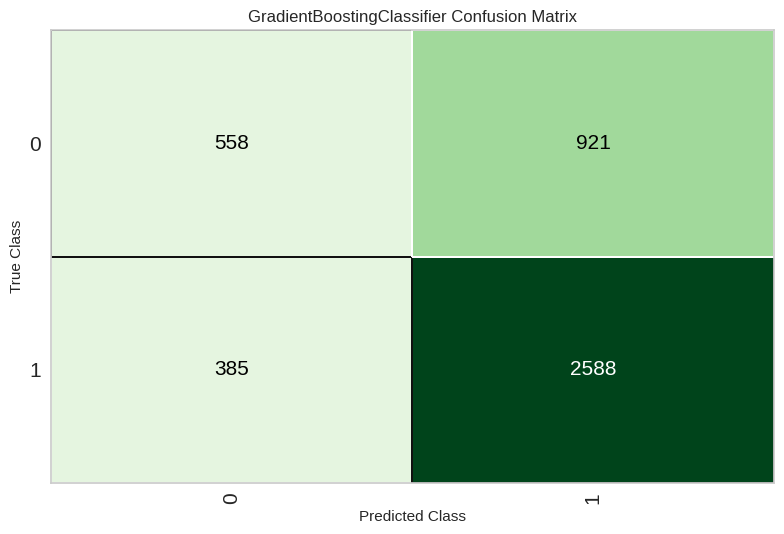

In [15]:
plot_model(best1, plot = 'confusion_matrix')

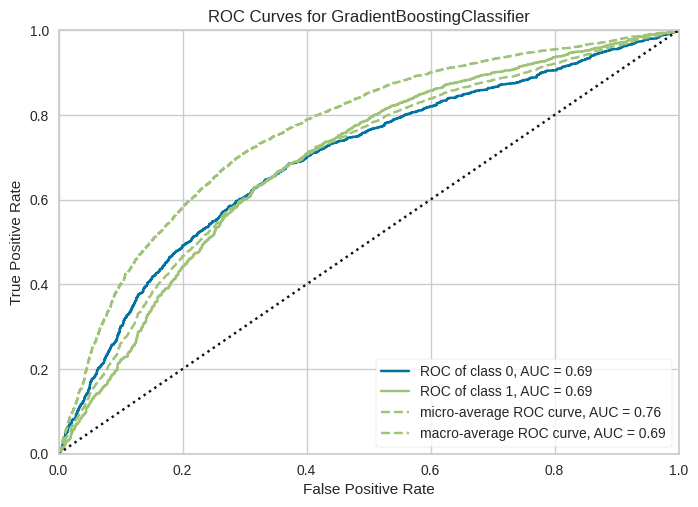

In [16]:
plot_model(best1, plot = 'auc')

In [18]:
holdout_pred = predict_model(best1)
predictions = predict_model(best1, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7066,0.6932,0.8705,0.7375,0.7985,0.2726,0.2856


In [19]:
predictions.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,prediction_label,prediction_score
0,344.632385,7.283604,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458580,0.000000,...,0.00000,0.000000,26.809273,24.539801,4.794537,47.304081,1,1,1,0.5183
1,1432.410156,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,98.32399,9.606882,0.000000,53.378235,0.000000,43.166668,0,0,1,0.8722
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969306,6.420822,...,0.00000,6.420822,11.752550,13.344559,9.589074,24.666666,1,1,1,0.7852
3,150.255707,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,0.00000,0.000000,17.744066,32.290169,4.794537,26.778866,0,0,1,0.7860
4,1817.276367,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554970,47.360207,...,0.00000,37.098999,69.141350,38.704128,50.697491,102.583336,0,0,1,0.8008


In [ ]:
#sub.head(10)

In [21]:
sub['EC1']=predictions['prediction_label']

### For EC2

In [23]:
model2 = setup(data = train2, target = 'EC2',session_id = 123)

,Description,Value
0,Session id,123
1,Target,EC2
2,Target type,Binary
3,Original data shape,"(14838, 32)"
4,Transformed data shape,"(14838, 32)"
5,Transformed train set shape,"(10386, 32)"
6,Transformed test set shape,"(4452, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [24]:
best2 = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7980,0.5820,0.9973,0.7995,0.8875,0.0049,0.0198,2.1560
ada,Ada Boost Classifier,0.7983,0.5770,0.9971,0.7998,0.8876,0.0082,0.0270,0.6750
lda,Linear Discriminant Analysis,0.7981,0.5726,0.9987,0.7989,0.8877,-0.0006,-0.0045,0.1280
catboost,CatBoost Classifier,0.7989,0.5719,0.9984,0.7996,0.8880,0.0066,0.0315,9.3580
lr,Logistic Regression,0.7980,0.5589,0.9983,0.7990,0.8876,0.0004,-0.0009,0.9470
lightgbm,Light Gradient Boosting Machine,0.7968,0.5580,0.9936,0.8003,0.8866,0.0132,0.0366,1.0730
rf,Random Forest Classifier,0.7967,0.5579,0.9942,0.8000,0.8866,0.0096,0.0247,1.7460
et,Extra Trees Classifier,0.7956,0.5561,0.9917,0.8003,0.8857,0.0123,0.0305,1.0170
qda,Quadratic Discriminant Analysis,0.3332,0.5525,0.2117,0.8234,0.3114,0.0149,0.0296,0.0720
nb,Naive Bayes,0.2834,0.5445,0.1306,0.8527,0.1699,0.0120,0.0355,0.0710


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

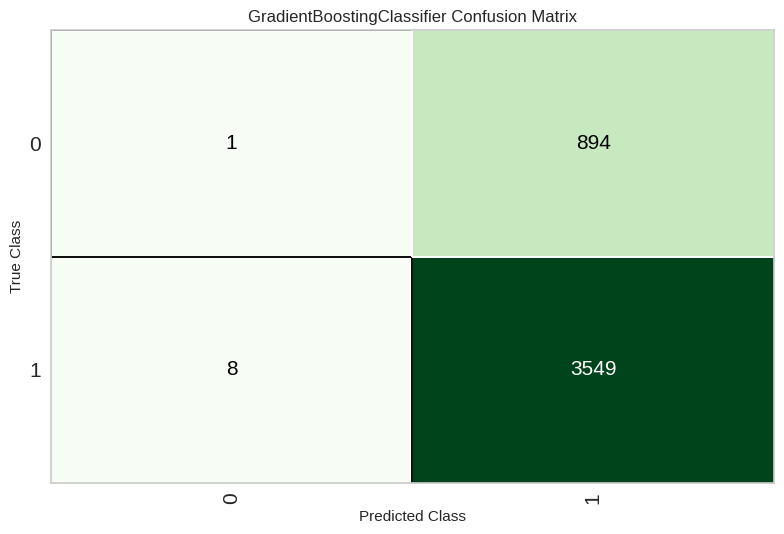

In [25]:
plot_model(best2, plot = 'confusion_matrix')

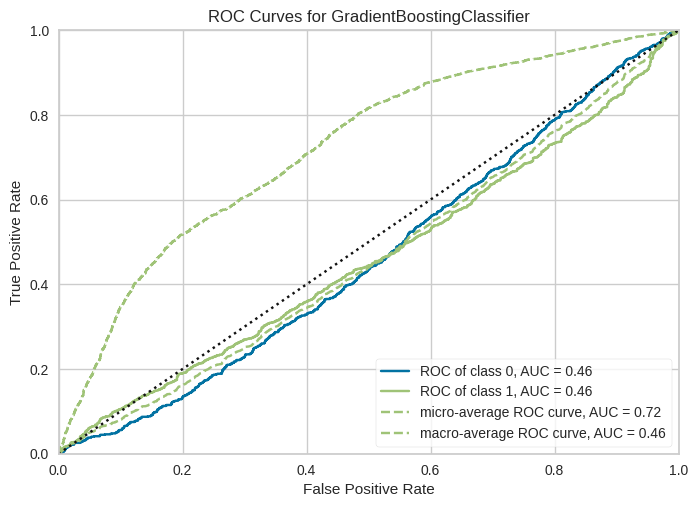

In [26]:
plot_model(best2, plot = 'auc')

In [27]:
holdout_pred2 = predict_model(best2)
predictions2 = predict_model(best2, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7974,0.5751,0.9978,0.7988,0.8872,-0.0018,-0.0101


In [28]:
predictions2.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,prediction_label,prediction_score
0,344.632385,7.283604,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458580,0.000000,...,0.00000,0.000000,26.809273,24.539801,4.794537,47.304081,1,1,1,0.7853
1,1432.410156,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,98.32399,9.606882,0.000000,53.378235,0.000000,43.166668,0,0,1,0.8854
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969306,6.420822,...,0.00000,6.420822,11.752550,13.344559,9.589074,24.666666,1,1,1,0.7333
3,150.255707,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,0.00000,0.000000,17.744066,32.290169,4.794537,26.778866,0,0,1,0.8211
4,1817.276367,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554970,47.360207,...,0.00000,37.098999,69.141350,38.704128,50.697491,102.583336,0,0,1,0.8140


In [29]:
sub['EC2']=predictions2['prediction_label']

In [32]:
sub.head()

,id,EC1,EC2
0,14838,1,1
1,14839,1,1
2,14840,1,1
3,14841,1,1
4,14842,1,1


In [34]:
sub.to_csv('submission.csv',index=False)